<h1><center>HW 3: Build Twitter Networks</center></h1>

### Q1. Scrape the follower-followee network by companies. (5 points)
    * Define a function to retrieve the follower-followee network of a list of twenty accounts of U.S. FT companies. 
    * The input will be a list of Twitter screen names. 
    * The output will be a dataframe with this list of accounts as row index and column index, and 1 and 0 as values.
    * Note: this will take some time because Twitter API will force you to sleep. 


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import re
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import tweepy
import datetime
import time


In [ ]:
CONSUMER_KEY=''
CONSUMER_SECRET=''
ACCESS_KEY=''
ACCESS_SECRET=''

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_KEY, ACCESS_SECRET)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

def get_follow(accounts):
    d = dict()
    res = [[0 for i in range(len(accounts))] for j in range(len(accounts))]
    edge_list = list()
    for idx, account in enumerate(accounts):
        d[account] = idx
        
    
    for src in accounts:
        for target in accounts:
            friendship = api.show_friendship(source_screen_name = src, target_screen_name = target)
            if friendship[0].followed_by:
                res[d[src]][d[target]] = 1
                edge_list.append([src, target])
            if friendship[0].following:
                res[d[target]][d[src]] = 1
                edge_list.append([target,src])
    df = pd.DataFrame(follows, index=accounts, columns=accounts).astype('bool')      
    return df, edge_list


In [ ]:
# test the function with the list of accounts

accounts=['walmart',
 'tysonfoods',
 'godaddy',
 'republicservice',
 'firstsolar',
 'taylor_morrison',
 'onsemi',
 'fm_fcx',
 'amkortechnology',
 'magellanhealth',
 'edwardslifesci',
 'visa',
 'cbre',
 'smartfinal',
 'google',
 'waltdisneyco',
 'atvi_ab',
 'ebay',
 'intuit',
 'edisonintl']


follows,edgesList = get_follow(accounts)

Rate limit reached. Sleeping for: 844
Rate limit reached. Sleeping for: 842


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df.to_csv('/content/drive/MyDrive/hw_660_csv/tdataframe.csv')

In [ ]:
from collections import defaultdict
elist = defaultdict(list)
for src, target in df.to_dict().items():
  [elist[src].append(t) for (t, conn) in target.items() if conn]

for a in accounts:
  if a not in elist:
    elist[a] = []

[None]

[None, None, None]

[]

[None]

[]

[None]

[None]

[]

[None]

[]

[]

[]

[None]

[None]

[]

[]

[]

[None]

[None]

[]

In [ ]:
df = pd.DataFrame(follows, index=accounts, columns=accounts).astype('bool')
df

,walmart,tysonfoods,godaddy,republicservice,firstsolar,taylor_morrison,onsemi,fm_fcx,amkortechnology,magellanhealth,edwardslifesci,visa,cbre,smartfinal,google,waltdisneyco,atvi_ab,ebay,intuit,edisonintl
walmart,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
tysonfoods,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
godaddy,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
republicservice,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
firstsolar,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
taylor_morrison,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
onsemi,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
fm_fcx,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
amkortechnology,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
magellanhealth,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Q2. Build a directed network with the data you just scraped. (5 points)
    * Bulid a network and visualize it. Hint: you can use "nx.convert_matrix.from_pandas_adjacency".
    * Calculate the indegree centrality and structural hole (you can use constraint). 
    * Sort these nodes by indegree centrality and print the top one account.
    * Sort these nodes by structural hole and print the top one account. 
    * Note the NA values in constraint measures. Also note the relation between structural hole and constraint.

In [ ]:
# Build a network from the adjacency matrix
temp_df = df*1
adjacency_matrix = temp_df.astype('float')
adjacency_matrix

,walmart,tysonfoods,godaddy,republicservice,firstsolar,taylor_morrison,onsemi,fm_fcx,amkortechnology,magellanhealth,edwardslifesci,visa,cbre,smartfinal,google,waltdisneyco,atvi_ab,ebay,intuit,edisonintl
walmart,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tysonfoods,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
godaddy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
republicservice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
firstsolar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
taylor_morrison,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
onsemi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fm_fcx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
amkortechnology,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
magellanhealth,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Figure size 1200x1000 with 0 Axes>

Text(0.5, 1.0, 'The follower-followee network of Fortune companies')

(-0.685894894850012,
 1.1601981574291866,
 -0.6262739608347851,
 0.9407520732559153)

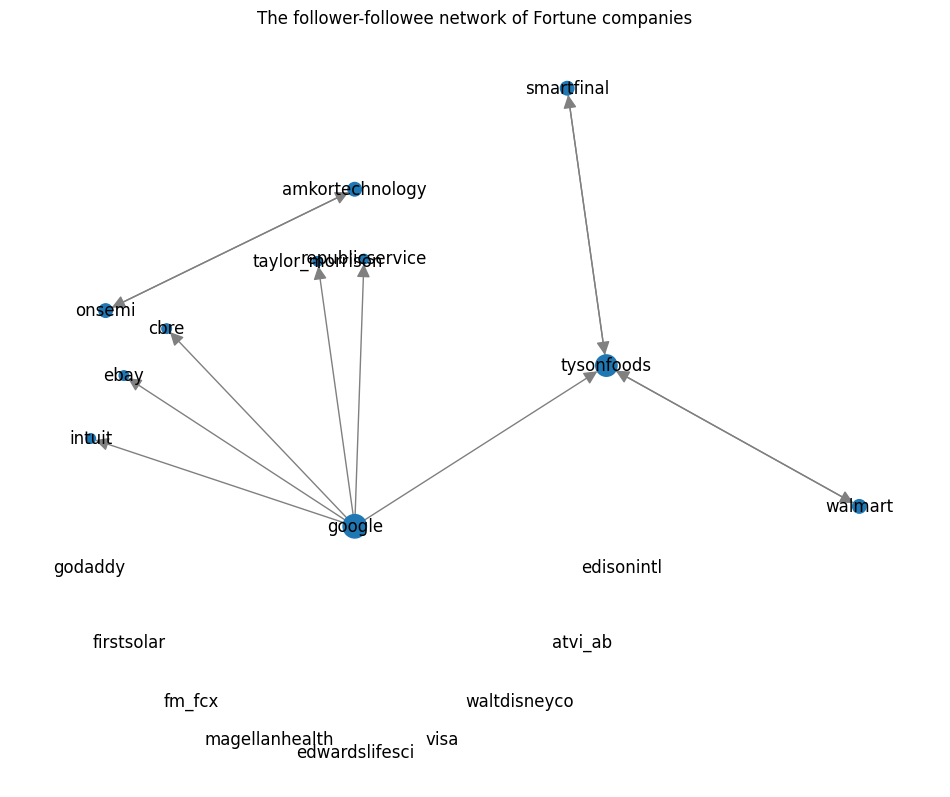

In [ ]:
# Visualize

G = nx.DiGraph()

for src, dest in elist.items():
  if len(dest) == 0 :
    G.add_node(src)
  else:
    for d in dest:
      G.add_edge(d, src)


figure(figsize=(12, 10), dpi=100)
node_size= [x * 900 for x in nx.degree_centrality(G).values()]
pos=nx.kamada_kawai_layout(G)
arrowsize=20

nx.drawing.nx_pylab.draw_networkx(G,
                                  node_size=node_size, 
                                  pos=pos,
                                  arrowsize=arrowsize,
                                  edge_color='grey',
                                  with_labels=True)

plt.title('The follower-followee network of Fortune companies')
plt.axis("off") 
plt.show()

In [ ]:
x = nx.constraint(G)
{k:v for k,v in x.items() if v > 0}
print(sorted([x for x in nx.in_degree_centrality(G).items()], key=lambda x: -x[1])[0][0])
print(sorted([x for x in nx.effective_size(G).items()], key=lambda x: -x[1])[0][0])

{'amkortechnology': 1.0,
 'google': 0.16666666666666669,
 'onsemi': 1.0,
 'smartfinal': 1.0,
 'tysonfoods': 0.3600000000000001,
 'walmart': 1.0}

tysonfoods
google


### Bonus question: (3 points)
 * Define a functionn to scrape the most recent (the recent week, but you can go beyond a bit if in one call you get a few) **original tweets** (exclude retweets) from multiple accouts. This function will take a list of screen names as input.
 * For each tweet, grab "id","created_at","full_text","user.screen_name".
 * Make a dataframe and return the dataframe.
 * Use the function to get the original tweets of the top twp accounts from Q2. 


In [ ]:
def get_all_tweets(user_names):
  res = []
  for user in user_names:
    tweet = api.user_timeline(screen_name=user, count=10,include_rts=False, exclude_replies=False)
    for rr in tweet:
      res.append([rr.id, rr.created_at, rr.text, rr.user.screen_name])
  df = pd.DataFrame(res)
  return df


tt=get_all_tweets(accounts) 
        
tt

,0,1,2,3
0,1454796910452252673,2021-10-31 13:06:26,"@Ploffzu We are doing great, how about yoursel...",Walmart
1,1454790667964751876,2021-10-31 12:41:38,@HealthAlfredo We are glad to help! 👍,Walmart
2,1454784113450364928,2021-10-31 12:15:35,@sah_vvy Yum! You're making our mouths water! 😋,Walmart
3,1454772677722492933,2021-10-31 11:30:09,@melaniejailene 😊🙌,Walmart
4,1454772652585934850,2021-10-31 11:30:03,"@Hermitius_ What's your favorite scent, Sophia?",Walmart
...,...,...,...,...
173,1448706034931945474,2021-10-14 17:43:29,Happening Now - Getting It Done: How Companie...,edisonintl
174,1447983758183784457,2021-10-12 17:53:24,Good read from @CanaryMediaInc https://t.co/GD...,edisonintl
175,1445814623509356547,2021-10-06 18:14:02,Join us and @lawacthevents for this timely con...,edisonintl
176,1445811101598248960,2021-10-06 18:00:03,"Join us and innovative leaders from business, ...",edisonintl
